### Changing K - Solution

In this notebook, you will get some practice with different values of **k**, and how it changes the clusters that are observed in the data.  As well as how to determine what the best value for **k** might be for a dataset.

To get started, let's read in our necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("health_data.csv")
data.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [3]:
# ALCPROBS1 = alcohol problems and has valued o to 6
# DEVIANT1 = deviant behaviour
# VIOL1 = Violent behaviour scale 
# dep = depression
# paractv = parental activity
# parpres = parential presence
# famconct = family connectedness
# esteem = self esteem

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BIO_SEX    4682 non-null   int64  
 1   age        3487 non-null   float64
 2   TREG1      4679 non-null   float64
 3   ALCEVR1    4643 non-null   float64
 4   ALCPROBS1  4682 non-null   int64  
 5   marever1   4682 non-null   int64  
 6   cocever1   4682 non-null   int64  
 7   inhever1   4682 non-null   int64  
 8   cigavail   4645 non-null   float64
 9   DEP1       4672 non-null   float64
 10  ESTEEM1    4672 non-null   float64
 11  VIOL1      4650 non-null   float64
 12  PASSIST    4682 non-null   int64  
 13  DEVIANT1   4644 non-null   float64
 14  SCHCONN1   4579 non-null   float64
 15  GPA1       4517 non-null   float64
 16  EXPEL1     4669 non-null   float64
 17  FAMCONCT   4682 non-null   float64
 18  PARACTV    4667 non-null   float64
 19  PARPRES    4582 non-null   float64
dtypes: float

In [4]:
# health_data.hist(figsize=(12,12))
# plt.show()

In [5]:
# convert into uppercase character in every column header
data.columns = map(str.upper, data.columns)

In [6]:
data.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [7]:
# drop the nan records in the dataset
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3314 entries, 1 to 4681
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BIO_SEX    3314 non-null   int64  
 1   AGE        3314 non-null   float64
 2   TREG1      3314 non-null   float64
 3   ALCEVR1    3314 non-null   float64
 4   ALCPROBS1  3314 non-null   int64  
 5   MAREVER1   3314 non-null   int64  
 6   COCEVER1   3314 non-null   int64  
 7   INHEVER1   3314 non-null   int64  
 8   CIGAVAIL   3314 non-null   float64
 9   DEP1       3314 non-null   float64
 10  ESTEEM1    3314 non-null   float64
 11  VIOL1      3314 non-null   float64
 12  PASSIST    3314 non-null   int64  
 13  DEVIANT1   3314 non-null   float64
 14  SCHCONN1   3314 non-null   float64
 15  GPA1       3314 non-null   float64
 16  EXPEL1     3314 non-null   float64
 17  FAMCONCT   3314 non-null   float64
 18  PARACTV    3314 non-null   float64
 19  PARPRES    3314 non-null   float64
dtypes: float

In [8]:
# We will consider the following clustyering variables
cluster = data[['ALCEVR1', 'MAREVER1', 'ALCPROBS1', 'DEVIANT1', 'VIOL1',\
     'DEP1', 'ESTEEM1', 'SCHCONN1', 'PARACTV', 'PARPRES', 'FAMCONCT']]

In [10]:
cluster_s = cluster.copy()

In [11]:
# standardize our variable mean=0 and std=1
from sklearn.preprocessing import scale

cluster_s['ALCEVR1'] = scale(cluster_s['ALCEVR1'].astype('float64'))
cluster_s['MAREVER1'] = scale(cluster_s['MAREVER1'].astype('float64'))
cluster_s['ALCPROBS1'] = scale(cluster_s['ALCPROBS1'].astype('float64'))
cluster_s['DEVIANT'] = scale(cluster_s['DEVIANT1'].astype('float64'))
cluster_s['VIOL1'] = scale(cluster_s['VIOL1'].astype('float64'))
cluster_s['DEP1'] = scale(cluster_s['DEP1'].astype('float64'))
cluster_s['ESTEEM1'] = scale(cluster_s['ESTEEM1'].astype('float64'))
cluster_s['SCHCONN1'] = scale(cluster_s['SCHCONN1'].astype('float64'))
cluster_s['PARACTV'] = scale(cluster_s['PARACTV'].astype('float64'))
cluster_s['PARPRES'] = scale(cluster_s['PARPRES'].astype('float64'))
cluster_s['FAMCONCT'] = scale(cluster_s['FAMCONCT'].astype('float64'))

In [12]:
cluster_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3314 entries, 1 to 4681
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALCEVR1    3314 non-null   float64
 1   MAREVER1   3314 non-null   float64
 2   ALCPROBS1  3314 non-null   float64
 3   DEVIANT1   3314 non-null   float64
 4   VIOL1      3314 non-null   float64
 5   DEP1       3314 non-null   float64
 6   ESTEEM1    3314 non-null   float64
 7   SCHCONN1   3314 non-null   float64
 8   PARACTV    3314 non-null   float64
 9   PARPRES    3314 non-null   float64
 10  FAMCONCT   3314 non-null   float64
 11  DEVIANT    3314 non-null   float64
dtypes: float64(12)
memory usage: 336.6 KB


In [13]:
# Let's do Kmeans analysis for 1 to 10 clusters
cluster_train, cluster_test = train_test_split(cluster_s, test_size=0.3, random_state=42)

In [14]:
cluster_train.shape, cluster_test.shape

((2319, 12), (995, 12))

`1.` Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

In [15]:
from scipy.spatial.distance import cdist

In [15]:
clusters = range(1,11)
mean_dist = []

In [16]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 'euclidean'),\
                               axis=1))/cluster_train.shape[0])

In [23]:
cluster_train.shape[0]

2319

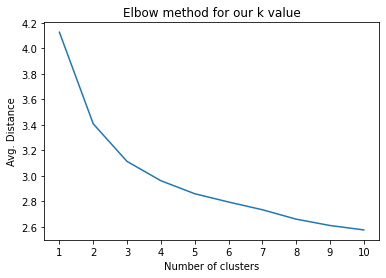

In [18]:
# Let's plot the elbow curve
plt.plot(clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Distance')
plt.title('Elbow method for our k value')

plt.xticks(range(1,11))
plt.show()

In [19]:
# canonical discrimation analysis

# k = 3 when cluster is 3 solution

In [20]:
model1 = KMeans(n_clusters=3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)

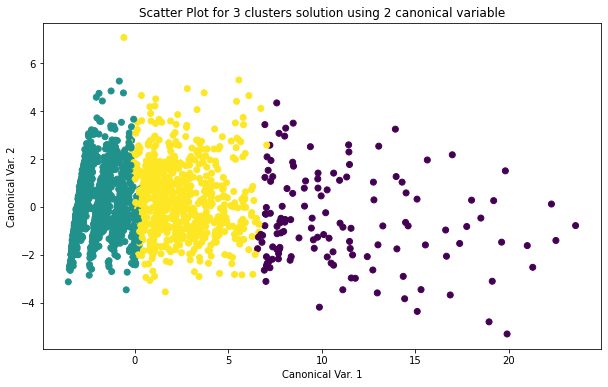

In [22]:
plt.figure(figsize=(10,6))
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model1.labels_,)
plt.xlabel('Canonical Var. 1')
plt.ylabel('Canonical Var. 2')
plt.title('Scatter Plot for 3 clusters solution using 2 canonical variable')
plt.show()

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

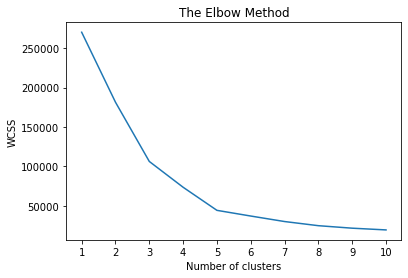

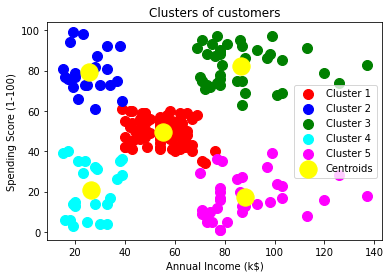

In [7]:
# first import the necessary library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset
dataset = pd.read_csv('KMeans.csv')
# dataset.head()

# make a cluster in annual income and spending score
X = dataset.iloc[:, [1, 2]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1,11))
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

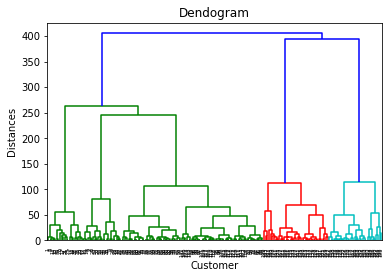

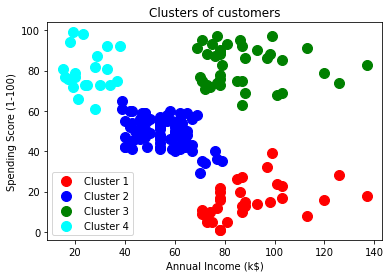

In [11]:
# Hierarchical 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('KMeans.csv')
X = dataset.iloc[:, [1, 2]].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('Distances')
plt.show();

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity ='euclidean', linkage = 'ward' )
y_hc=hc.fit_predict(X)



# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Estimated number of clusters: 7
Estimated number of noise points: 35


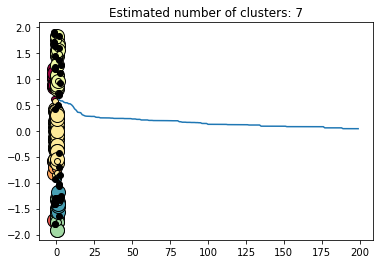

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('KMeans.csv')
X = dataset.iloc[:, [1, 2]].values
X = StandardScaler().fit_transform(X)

ns = 3
nbrs = NearestNeighbors(n_neighbors=ns).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)

db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()